# Campo magnético de un iman
###### Gabriel Missael Barco, 30/04/2020


Se midió el campo magnetico de un iman utilizando el sensor incluido en un smartphone y la aplicación [Phyphox](https://phyphox.org/), esto unicamente sobre el eje X (ignorando la medición obtenida en Y y en Z). Se realizaron un total de 8 mediciones para dos imanes. A continuación, extraeremos los datos proporcionados por Phyphox, obtendremos la media $m$ y la desviación estandar $\sigma$ de los valores medidos, los cuales esperamos tengan una distribución gaussiana.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.stats as stats
from scipy.optimize import minimize

Extraemos los datos obtenidos con pandas:

In [2]:
iman = [[],[]]

for i in range(2):
    for j in range(9):
        iman[i].append(pd.read_csv('Datos/Iman'+str(i+1)+'-'+str(j)+'/Raw Data.csv'))

Podemos ver como estan organizados los datos para poder trabajarlos:

In [3]:
iman[0][0].head()

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
0,0.00,137.352737,33.534267,-5.804306,141.506224
1,0.01,136.896408,33.668697,-6.399063,141.121068
2,0.02,136.005768,34.545773,-5.787415,140.443845
3,0.03,135.076645,33.032154,-6.667236,139.216649
4,0.04,136.283554,32.910824,-6.535812,140.353291


Realizaremos el histograma de una de las lectura para observar que tiene una distribucion aproximadamente gaussiana:

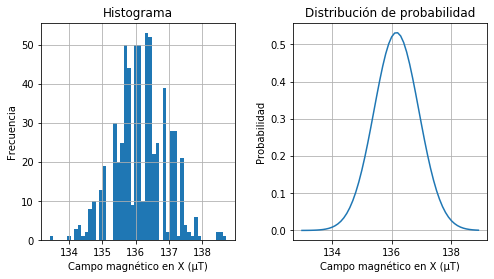

In [4]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4))

sample = iman[0][0]['Magnetic Field x (µT)']

axs[0].hist(sample, 50)
axs[0].set_xlabel('Campo magnético en X (µT)')
axs[0].set_ylabel('Frecuencia')
axs[0].grid()
axs[0].set_title('Histograma')
m = np.mean(sample)
v = np.std(sample)

x = np.arange(133, 139, 0.1)
axs[1].plot(x, stats.norm.pdf(x, m, v))
axs[1].set_xlabel('Campo magnético en X (µT)')
axs[1].set_ylabel('Probabilidad')
axs[1].set_title('Distribución de probabilidad')
axs[1].grid()

plt.subplots_adjust(wspace = 0.3)

Las inconsistencias del histograma se deben probablemente a que los valores leídos por el telefono tienen cierta precisón limite, muy proabablemete en el orden $\mu T$. Sin embargo, podemos considerar que tiene una distribución Gaussiana.
Es posible tambíen visualizar que es gaussiana si sencillamente gráficamos los valores:

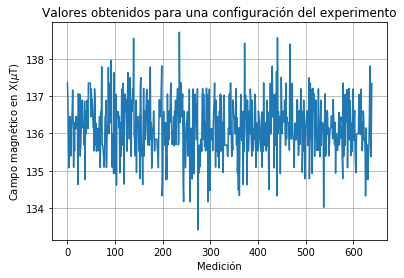

In [5]:
plt.plot([x for x in range(len(sample))], sample)
plt.grid()
plt.ylabel('Campo magnético en X($\mu$T)')
plt.xlabel('Medición')

plt.title('Valores obtenidos para una configuración del experimento')
plt.show()

Podemos observar que los valores tienen cierta tendencia a tener una *linea central*, que corresponde a la media, y conforme nos alejamos de ese valor, aparecen menos registros medidos, como se esperaria en una distribución gaussiana.
Ahora, obtendremos las medias y las desviaciones estandar para todos las mediciones obtenidas en el experimento 

In [6]:
media = [[], []]
sigma = [[],[]]

for i in range(2):
    for j in range(9):
        media[i].append(np.mean(iman[i][j]['Magnetic Field x (µT)']))
        sigma[i].append(np.std(iman[i][j]['Magnetic Field x (µT)']))

#Retiramos el campo magnetico de fondo (primera lecutura)
for i in range(2):
    for j in range(1,9):
        media[i][j] -= media[i][0]

Gráficamos para visualizar el resultado:

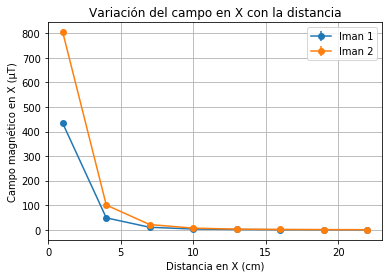

In [7]:
#Las distancias son:
x = [22, 19, 16, 13, 10, 7, 4, 1]

plt.errorbar(x, media[0][1:9], yerr = sigma[0][1:9], mew = 4, marker = '.', label = 'Iman 1')
plt.errorbar(x, media[1][1:9], yerr = sigma[0][1:9], mew = 4, marker = '.', label = 'Iman 2')

plt.xlabel('Distancia en X (cm)')
plt.ylabel('Campo magnético en X (µT)')
plt.legend()
plt.title('Variación del campo en X con la distancia')
plt.grid()
plt.show()

Nos será mas util hacer una escala logaritmica, para obtener una linea :) y hacer de manera mas sencilla. Esto es porque queremos encontrar $n$ de la expresión:

$B = Ax^n$

Aplicando el logaritmo tenemos:

$ln(B) = \ln(A) + n\ln(x) = C + n\ln(x)$

Por lo que solo tenemos que hacer un ajuste por minimos cuadrados para obtener la ecuación de la recta, y por lo tanto, las constantes C y n.

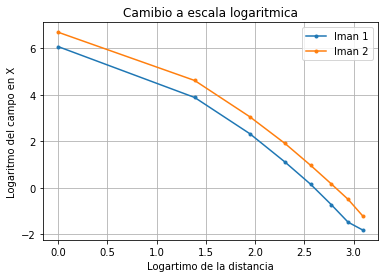

In [8]:
x = [22, 19, 16, 13, 10, 7, 4, 1]

newMedia = np.log(media)
newX = np.log(x)

plt.plot(newX, newMedia[0][1:9], label = 'Iman 1', marker = '.')
plt.plot(newX, newMedia[1][1:9], label = 'Iman 2', marker = '.')

plt.ylabel('Logaritmo del campo en X')
plt.xlabel('Logartimo de la distancia')
plt.title('Camibio a escala logaritmica')
plt.legend()
plt.grid()

Obtenemos las pendientes y las ordenadas al origen de las rectas por minimos cuadrados:

In [43]:
x = sum(newX[0:7])
xs = sum([newX[i]**2 for i in range(7)])

y1 = sum(newMedia[0][1:9])
y2 = sum(newMedia[1][1:9])
xy1 = sum([newX[i]*newMedia[0][i+1] for i in range(8)])
xy2 = sum([newX[i]*newMedia[1][i+1] for i in range(8)])

m1 = (8*xy1-x*y1)/(8*xs-x**2)
m2 = (8*xy2-x*y2)/(8*xs-x**2)

b1 = (y1-m1*x)/8
b2 = (y2-m2*x)/8

Graficamos el ajuste:

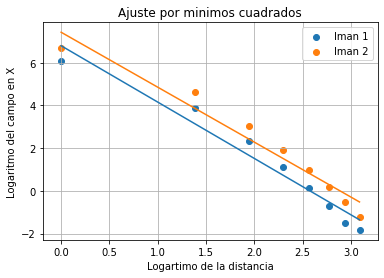

In [44]:
grap = np.arange(0, 3.1, 0.01)

plt.scatter(newX, newMedia[0][1:9], label = 'Iman 1', marker = 'o')
plt.scatter(newX, newMedia[1][1:9], label = 'Iman 2', marker = 'o')

plt.plot(grap, grap*m1+b1)
plt.plot(grap, grap*m2+b2)

plt.ylabel('Logaritmo del campo en X')
plt.xlabel('Logartimo de la distancia')
plt.title('Ajuste por minimos cuadrados')
plt.legend()
plt.grid()

In [45]:
print(f'Valores de n obtenidos: \nPara el iman 1 n = {m1} \nPara el iman 2 n = {m2}')

Valores de n obtenidos: 
Para el iman 1 n = -2.639140766164448 
Para el iman 2 n = -2.573112763856266
